In [17]:
import ROOT
ROOT.gROOT.ProcessLine(".x $BRUFIT/macros/LoadBru.C")

0

Info in <ACLiC>: unmodified script has already been compiled and loaded


In [18]:
%run ./toolkit/binner.ipynb
#%run ./toolkit/fitter.ipynb

# Creating Binnings
---

Input File (Merged from many parallel runs of CLAS12Analysis)

In [19]:
infile = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/MC/testsmall/merged_run.root"

Create the bingrids

In [20]:
bc1=BinGrid()
bc1.setBins("x",[0.1,0.13,0.16,0.19,0.235,0.3,0.5])
bc2=BinGrid()
bc2.setBins("z",[0.35,0.43,0.49,0.55,0.62,0.7,0.83])
bc3=BinGrid()
bc3.setBins("Mdihadron",np.linspace(0.3,1.3,8))

Create Binnify master class which stores multiple bin grids

In [21]:
BINNIFY=Binnify("reco",infile,"tree_postprocess")
BINNIFY.addGrid(bc1)
BINNIFY.addGrid(bc2)
BINNIFY.addGrid(bc3)

Executing binning program, splitting merged TTree into smaller bins

In [22]:
BINNIFY.Binnify()

9989


Test output

TFile**		/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/nSidis/testall/merged_run_binned_save2.root	
 TFile*		/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/nSidis/testall/merged_run_binned_save2.root	
  KEY: TTree	bin1d_x_0.3_0.5;4	Binned TTree
  KEY: TTree	bin1d_x_0.3_0.5;3	Binned TTree
  KEY: TTree	bin1d_z_0.7_0.83;5	Binned TTree
  KEY: TTree	bin1d_z_0.7_0.83;4	Binned TTree
  KEY: TTree	bin1d_x_0.235_0.3;4	Binned TTree
  KEY: TTree	bin1d_x_0.235_0.3;3	Binned TTree
  KEY: TTree	bin1d_z_0.62_0.7;4	Binned TTree
  KEY: TTree	bin1d_z_0.62_0.7;3	Binned TTree
  KEY: TTree	bin1d_Mdihadron_0.7285714285714285_0.8714285714285714;4	Binned TTree
  KEY: TTree	bin1d_Mdihadron_0.7285714285714285_0.8714285714285714;3	Binned TTree
  KEY: TTree	bin1d_x_0.19_0.235;4	Binned TTree
  KEY: TTree	bin1d_x_0.19_0.235;3	Binned TTree
  KEY: TTree	bin1d_z_0.55_0.62;4	Binned TTree
  KEY: TTree	bin1d_z_0.55_0.62;3	Binned TTree
  KEY: TTree	bin1d_Mdihadron_0.3_0.44285714285714284;4	Binned TTre

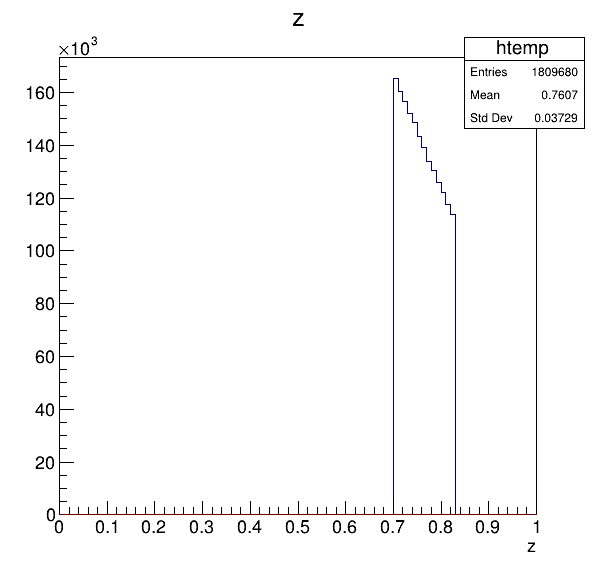

In [3]:
outfile=ROOT.TFile("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/nSidis/testall/merged_run_binned_save2.root","READ")
outfile.ls()

t=outfile.Get("bin1d_z_0.7_0.83")

c=ROOT.TCanvas("c","c",600,600)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
t.Draw("z","","same PLC")
t.Draw("truez","","same PLC")

c.Draw()

In [15]:
%run ./toolkit/binner.ipynb
%run ./toolkit/fitter.ipynb

splotUnBinnedFit: Performing unbinned Mdiphoton fit for bin1d_x_0.1_0.13
splotUnBinnedFit: Completed unbinned Mdiphoton fit for bin1d_x_0.1_0.13
splotUnBinnedFit: Loading sWeights for bin1d_x_0.1_0.13
splotUnbinnedFit: Fitting 2d modulations for bin1d_x_0.1_0.13


AttributeError: 'FitBin' object has no attribute 'sdbnd'

DataEvents::Load bin1d_x_0.1_0.13 with 1 files
DataEvents::Load bin1d_x_0.1_0.13 with 1 files
FitManager::RedirectOutput text ouput will be sent to file /work/clas12/users/gmat/CLAS12Analysis/macros/analysis/rg-a/splot/splot_bin1d_x_0.1_0.13/logRooFit0.txt
RooArgList:: = (#mu,#sigma,a0,a1,a2,a3)
RooArgList:: = (Yld_Signal,Yld_BG)
REMOVE FILEDTREE 0
REMOVED FILEDTREE 
Weights HSsWeights contains 1536 events associated file is 
ID branch name : fidmerge
Species are : 
BG
Signal
The first ten entries are :
7 -0.183546 1.18354 
11 -0.183546 1.18354 
14 -0.183545 1.18354 
15 -0.183546 1.18354 
17 1.04362 -0.0436233 
19 -0.183546 1.18354 
21 1.03479 -0.0348002 
22 1.098 -0.0980104 
23 0.868097 0.131897 
24 1.10416 -0.104169 
  DataEvents::LoadWeights using Signal weights /work/clas12/users/gmat/CLAS12Analysis/macros/analysis/rg-a/splot/splot_bin1d_x_0.1_0.13/Weights.root HSsWeights
FitManager::RedirectOutput text ouput will be sent to file /work/clas12/users/gmat/CLAS12Analysis/macros/analys

Info in <ACLiC>: unmodified script has already been compiled and loaded


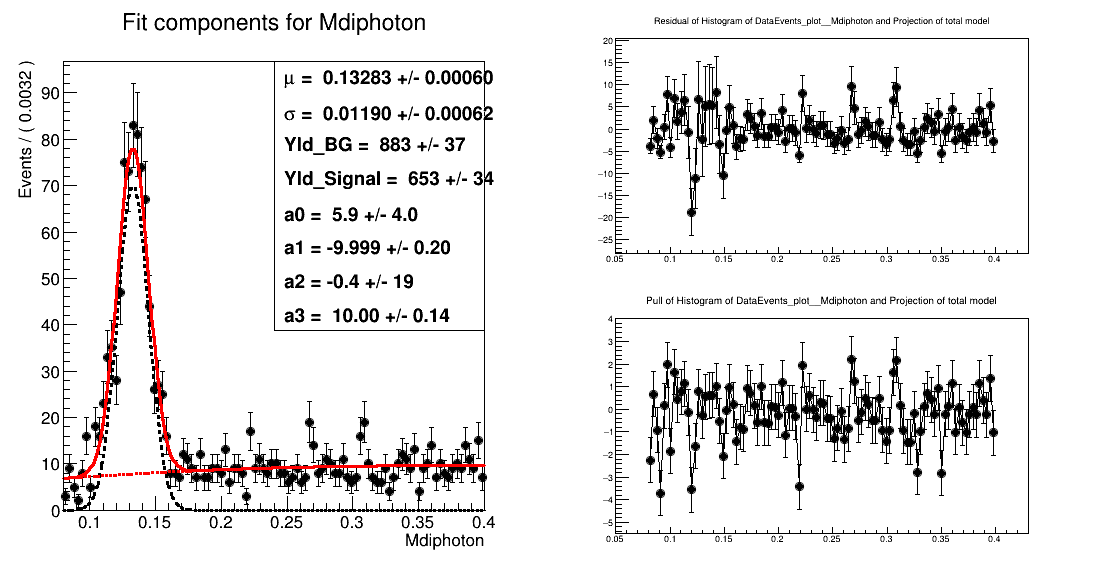

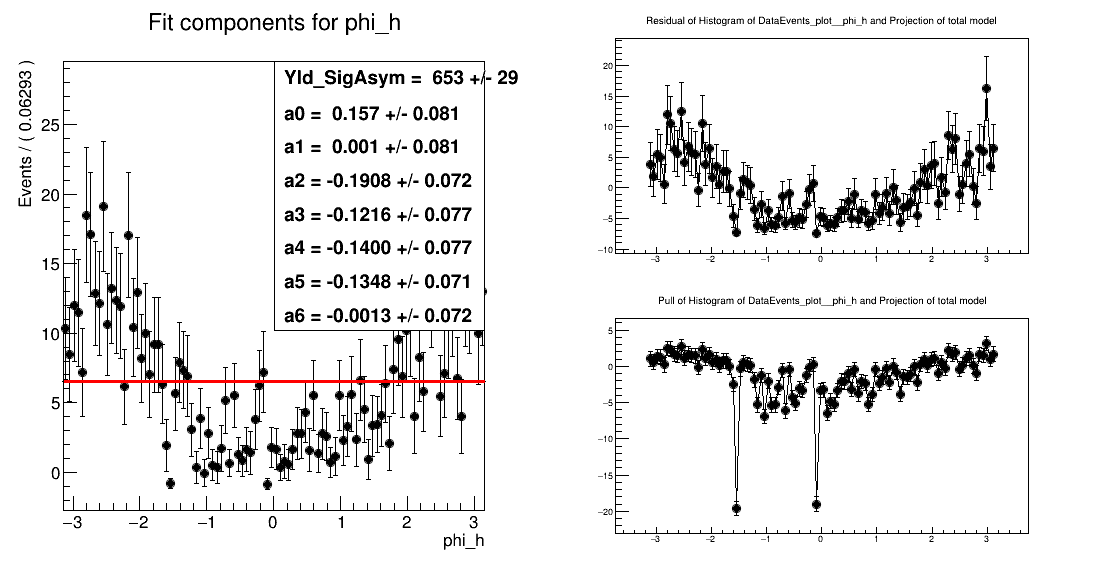

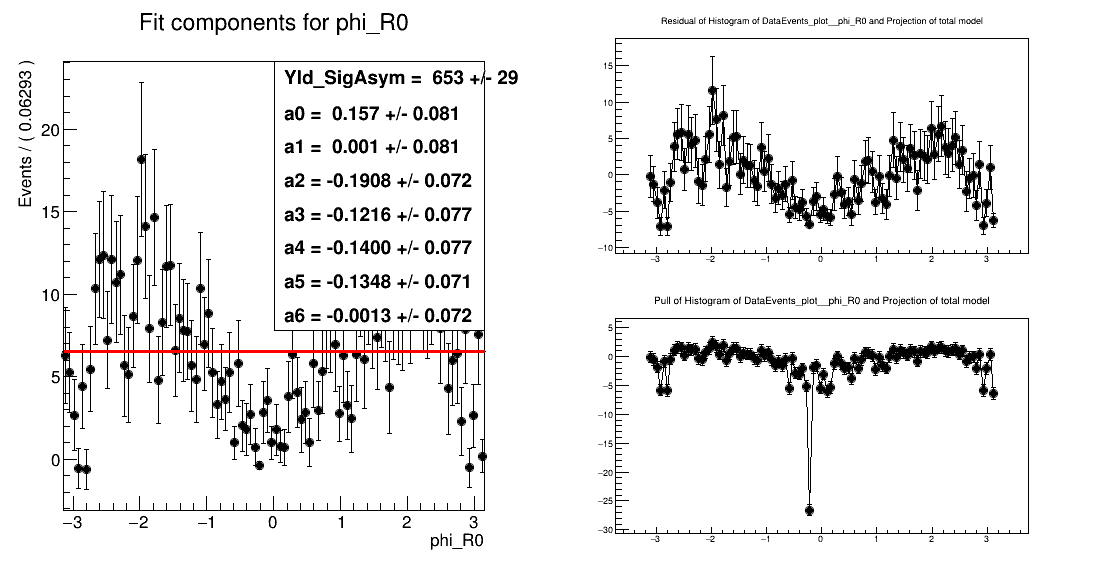

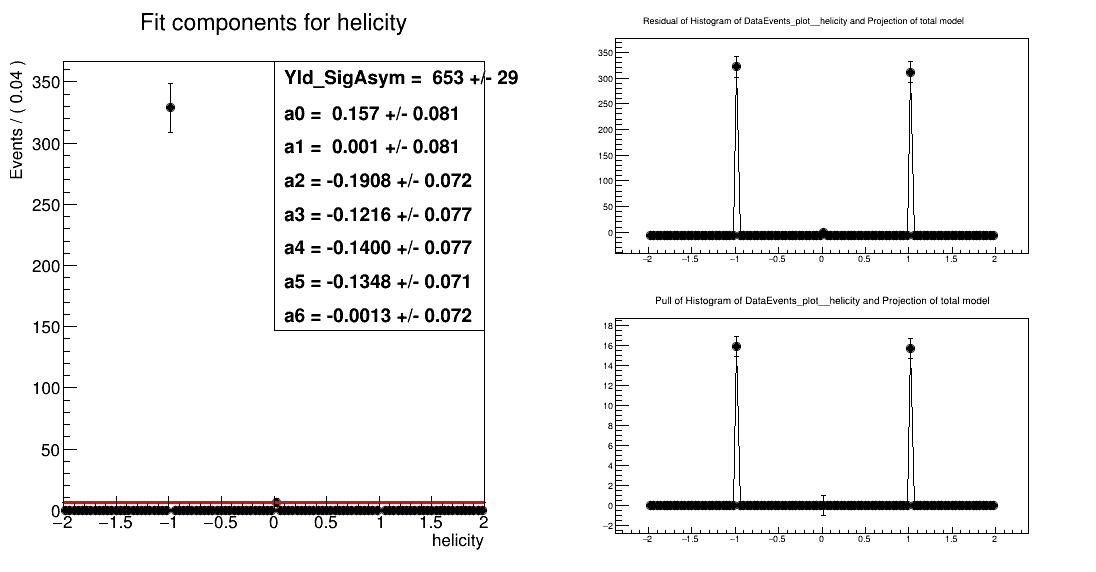

In [16]:
f=Fittify("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/nSidis/testsmall/merged_run_binned.root",1)

In [4]:
f.df_sdbnd[["sigParam0_u3","bintype1","binlower1","binupper1"]]

,sigParam0_u3,bintype1,binlower1,binupper1
0,0.003407,x,0.300000,0.500000
1,0.003407,x,0.300000,0.500000
2,0.004243,z,0.700000,0.830000
3,0.004243,z,0.700000,0.830000
4,0.010776,x,0.235000,0.300000
5,0.010776,x,0.235000,0.300000
6,0.004304,z,0.620000,0.700000
7,0.004304,z,0.620000,0.700000
8,0.021182,Mdihadron,0.728571,0.871429
9,0.021182,Mdihadron,0.728571,0.871429


In [5]:
name="Mdihadron"
x=0.5*(f.df_sdbnd[f.df_sdbnd.bintype1==name].binlower1 + f.df_sdbnd[f.df_sdbnd.bintype1==name].binupper1)
y=f.df_sdbnd[f.df_sdbnd.bintype1==name].sigParam0_u3
yerr=f.df_sdbnd[f.df_sdbnd.bintype1==name].sigError0_u3

In [6]:
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-urt7wl85 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<ErrorbarContainer object of 3 artists>

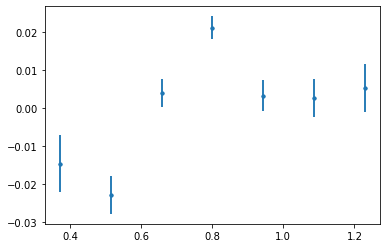

In [7]:
plt.errorbar(x,y,yerr,fmt=".")

In [2]:
F = ROOT.TFile("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rg-a/sept19_beta_0.02/si","READ")
F.ls()

TFile**		/volatile/clas12/users/gmat/clas12analysis.sidis.data/rg-a/sept19_beta_0.02/asymmetry.root	
 TFile*		/volatile/clas12/users/gmat/clas12analysis.sidis.data/rg-a/sept19_beta_0.02/asymmetry.root	
  KEY: TGraphErrors	sideband_x_sig_0;1	Graph
  KEY: TGraphErrors	sideband_x_sigbg_0;1	Graph
  KEY: TGraphErrors	sideband_x_bg_0;1	Graph
  KEY: TGraphErrors	splot_x_sig_0;1	Graph
  KEY: TGraphErrors	splot_x_sigbg_0;1	Graph
  KEY: TGraphErrors	splot_x_bg_0;1	Graph
  KEY: TGraphErrors	sideband_x_sig_1;1	Graph
  KEY: TGraphErrors	sideband_x_sigbg_1;1	Graph
  KEY: TGraphErrors	sideband_x_bg_1;1	Graph
  KEY: TGraphErrors	splot_x_sig_1;1	Graph
  KEY: TGraphErrors	splot_x_sigbg_1;1	Graph
  KEY: TGraphErrors	splot_x_bg_1;1	Graph
  KEY: TGraphErrors	sideband_x_sig_2;1	Graph
  KEY: TGraphErrors	sideband_x_sigbg_2;1	Graph
  KEY: TGraphErrors	sideband_x_bg_2;1	Graph
  KEY: TGraphErrors	splot_x_sig_2;1	Graph
  KEY: TGraphErrors	splot_x_sigbg_2;1	Graph
  KEY: TGraphErrors	splot_x_bg_2;1	Graph
  KEY: TG

0.9428575038909912 0.0019733908120542765
1.08571457862854 0.00624548876658082
0.800000011920929 0.022137107327580452
0.6571425199508667 0.0033982652239501476
0.3714284896850586 -0.02530694752931595
0.5142855048179626 -0.012391491793096066
0.0 0.0


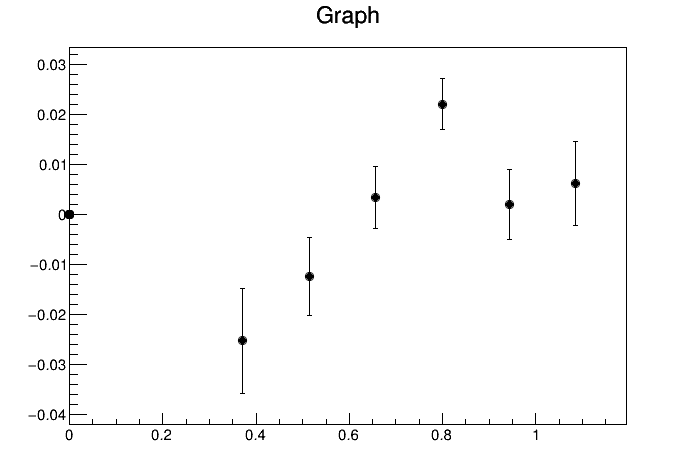

In [25]:
c = ROOT.TCanvas()
c.Draw()
tg=F.Get("sideband_Mdihadron_sig_0")
tg.SetMarkerStyle(20)
tg.Draw("AP")
for i in range(7):
    print(tg.GetPointX(i),tg.GetPointY(i))

In [24]:
F = ROOT.TFile("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rg-a/sept19_beta_0.02/sideband_bin_z_0.350000_0.430000/sidebandMethod.root","READ")
F.ls()

TFile**		/volatile/clas12/users/gmat/clas12analysis.sidis.data/rg-a/sept19_beta_0.02/sideband_bin_z_0.350000_0.430000/sidebandMethod.root	
 TFile*		/volatile/clas12/users/gmat/clas12analysis.sidis.data/rg-a/sept19_beta_0.02/sideband_bin_z_0.350000_0.430000/sidebandMethod.root	
  KEY: TTree	tree;1	Sideband Method Related Variables
  KEY: TF1	f_diphoton_sig;1	gaus(0)+pol4(3)
  KEY: TF2	f_sigbg;1	[0]*sin(2*x-2*y)+[1]*sin(x-y)+[2]*sin(-x+2*y)+[3]*sin(y)+[4]*sin(x)+[5]*sin(2*x-y)+[6]*sin(3*x-2*y)
  KEY: TF2	f_bg;1	[0]*sin(2*x-2*y)+[1]*sin(x-y)+[2]*sin(-x+2*y)+[3]*sin(y)+[4]*sin(x)+[5]*sin(2*x-y)+[6]*sin(3*x-2*y)
  KEY: TH1F	h1_sbnd;1	


100

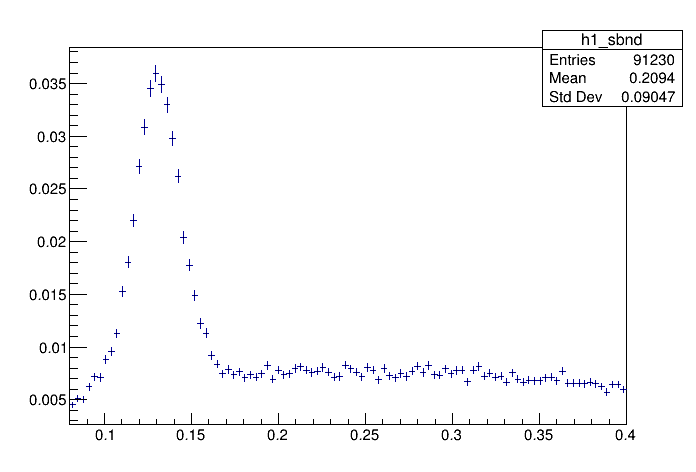

In [25]:
F.Get("h1_sbnd").Draw()
c.Draw()
F.Get("h1_sbnd").GetNbinsX()

In [8]:

FF=ROOT.TFile("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/nSidis/testall/merged_run.root","READ")
TT=FF.Get("tree_postprocess")
TT.GetEntries()

7904709

Warning in <TFile::Append>: Replacing existing TH1: hh (Potential memory leak).


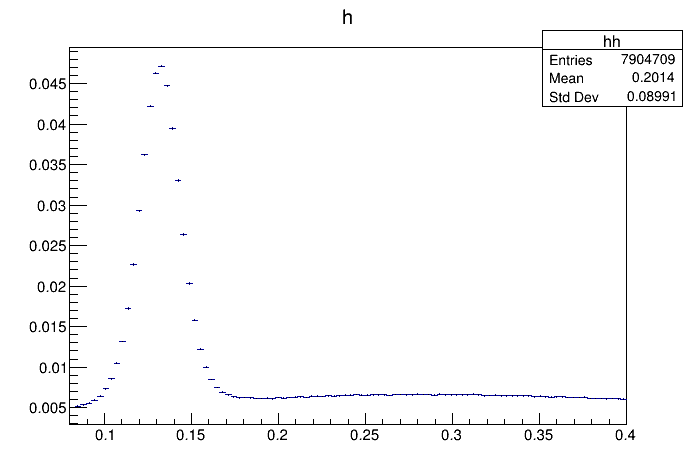

In [10]:
c = ROOT.TCanvas()
h=ROOT.TH1F("hh","h",100,0.08,0.4)
TT.Draw("Mdiphoton>>hh","","goff")
h.Scale(1.0/h.Integral())
h.Draw("")
c.Draw()

In [23]:
FFF=ROOT.TFile("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rg-a/sept14/merged_sept14.root","READ")
TTT=FFF.Get("tree_postprocess")
TTT.GetEntries()

5399722